## Принятие решений в бизнесе на основе данных

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

pd.set_option('max_colwidth', 300)

### Часть 1. Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

##### Задача

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


In [2]:
hypothesis = pd.read_csv(r'C:\Users\Пользователь\Documents\my_docs\projects\hypothesis.csv')

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values('ICE', ascending=False).round(1)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [5]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении метода ICE  в топ-3 оказались гипотезы № 8, 0 и 7. Метод RICE учитывает охват аудитории, т.е. кол-во пользователей, которых она затронет, у 8-й гипотезы самый низкий показатель охвата, поэтому она сместилась на пятое место, а 7-я, к-я охватывает почти всех пользователей, оказалась на 1-месте.

### Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

##### Задача: проанализируйте A/B-тест:

In [6]:
orders = pd.read_csv(r'C:\Users\Пользователь\Documents\my_docs\projects\orders.csv')
visitors = pd.read_csv(r'C:\Users\Пользователь\Documents\my_docs\projects\visitors.csv')
display(visitors)
display(orders.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [8]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transactionId' : pd.Series.nunique, 
      'visitorId' : pd.Series.nunique, 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


#### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения. 

In [9]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 
          'group' : 'max',
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [10]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# рассчитаем средний чек по накопительным данным
cummulativeData['check'] = cummulativeData['revenue']/cummulativeData['orders']

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,check
0,2019-08-01,A,24,20,148579,719,6190.791667
1,2019-08-01,B,21,20,101217,713,4819.857143
2,2019-08-02,A,44,38,242401,1338,5509.113636
3,2019-08-02,B,45,43,266748,1294,5927.733333
4,2019-08-03,A,68,62,354874,1845,5218.735294


In [11]:
# Напишем функцию для построения парных графиков по разным показателям
def graf(df1, df2, val, title):
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.plot(df1['date'], df1[val], label='A')
    plt.plot(df2['date'], df2[val], label='B')
    ax.set_xticklabels(df1['date'], rotation = 45)
    ax.set_title(title, fontsize = 15)
    plt.legend()
    plt.show()

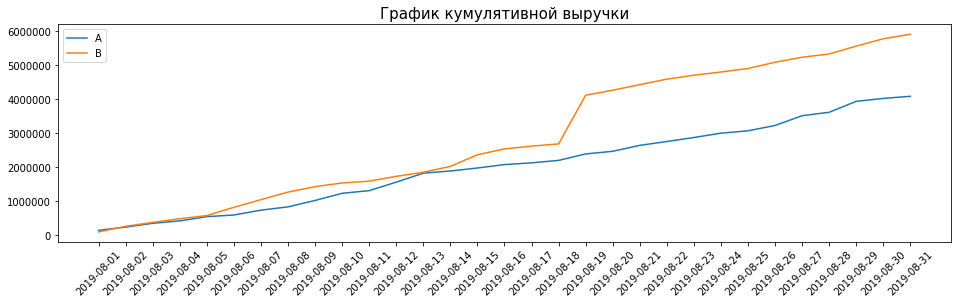

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders', 'check']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders', 'check']]

graf(cummulativeRevenueA, cummulativeRevenueB, 'revenue', 'График кумулятивной выручки')

Выручка равномерно увеличивалась в обеих группах в течение теста, но по группе **B** в середине месяца произошел существенный рост. Это может говорить о о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

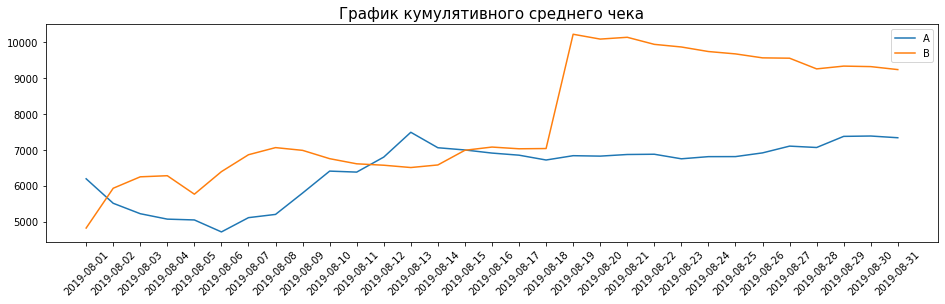

In [13]:
#Построим графики среднего чека по группам A и B
graf(cummulativeRevenueA, cummulativeRevenueB, 'check', 'График кумулятивного среднего чека')

В начале эксперимента средний чек группы B быль выше чека группы А, затем чеки сровнялись. Но как и на графике кумулятивной выручки в середине месяца по группе В произошло существенное увеличение чека, это подтверждает предположение, что выборку попали очень дорогие заказы.

#### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

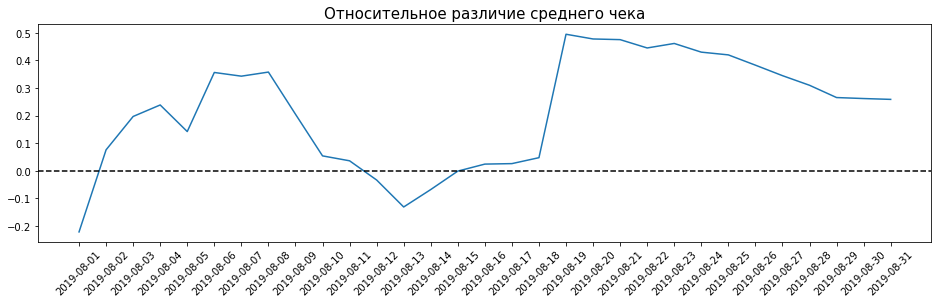

In [14]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(
    cummulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xticklabels(mergedCummulativeRevenue['date'], rotation = 45)
plt.title('Относительное различие среднего чека', fontsize=15)

plt.plot(mergedCummulativeRevenue['date'], 
         mergedCummulativeRevenue['checkB']/mergedCummulativeRevenue['checkA'] - 1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

По графику относительного изменения чека видно, что чек группы В, то выше, то ниже чека группы А. Также нужно помнить об аномально дорогих заказах в группе B с середины месяца, поэтому однозначно сделать вывод о том, что чек группы В выше нельзя.

Здесь также стоит отметить, что все три графика демонстрируют одну картину - это всегда хорошо.

#### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

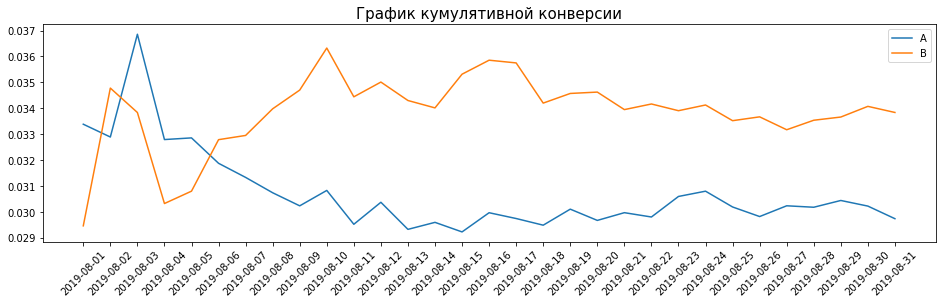

In [15]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группах A и В
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
graf(cummulativeDataA, cummulativeDataB, 'conversion', 'График кумулятивной конверсии')

По графику можно сделать вывод, что конверсия группы B однозначно выше группы А.

#### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

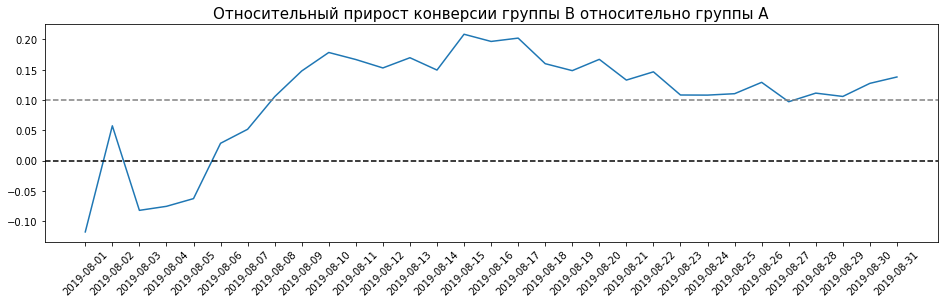

In [16]:
# собираем данные о конверсии в одном датафрейме
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(
    cummulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# строим график
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xticklabels(mergedCummulativeRevenue['date'], rotation = 45)
plt.title('Относительный прирост конверсии группы B относительно группы A', fontsize=15)

plt.plot(mergedCummulativeConversions['date'], 
         mergedCummulativeConversions['conversionB']/
         mergedCummulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

В начале эксперимента конверсия группы В была ниже значения группы А, но затем конверсия группы В стала стабильно выше группы А более чем на 10%.

### Анализ выбросов и всплесков: крайние значения данных

#### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [17]:
orders_by_user = orders.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

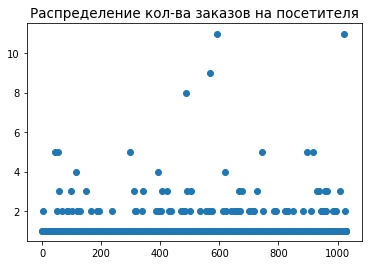

In [18]:
# вспомогательная ось, т.к. метод scatter принимает на вход данные по осям  (Х и Y)
x_values = pd.Series(range(0,len(orders_by_user))) 

# строим график распределения
plt.scatter(x_values, orders_by_user['transactionId'])
plt.title('Распределение кол-ва заказов на посетителя', fontsize=13.5)
plt.show()

По графику видно, что чаще всего пользователи совершают 1-2 заказа.

#### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [19]:
np.percentile(orders_by_user['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершало более 2 заказов, а более 4 заказов совсем редкое явление.

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [20]:
len(orders['revenue'])

1197

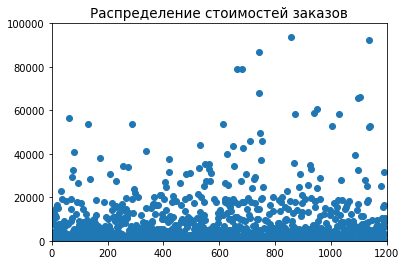

In [21]:
x_values = pd.Series(range(0,len(orders['revenue']))) 

plt.scatter(x_values, orders['revenue'])
plt.axis([0,1200,0,100000])
plt.title('Распределение стоимостей заказов', fontsize=13.5)
plt.show()

Из графика видно, что большая часть заказов имеет выручку до 20 т.р., но есть и заказы дороже, поэтому следует оценить границы нормальных значений.

#### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [22]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

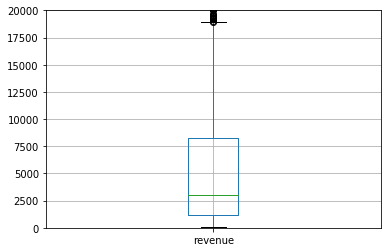

In [23]:
# дополнительно посмотрим на границы выбросов по графику
orders.boxplot(column = ['revenue'])
plt.ylim(0, 20000)
plt.show()

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей, при этом выбросом можно считать значения более 20т.р.

#### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Для расчета статистической значимости нам нужно получить для групп А и В выборки, где каждый элемент — число заказов определённого посетителя, в том числе ноль. Информация о всех посетителях у нас агрегированная, поэтому рассчитать кол-во посетителей с 0 кол-вом заказов можно только, если **из общего кол-ва посетителей** вычесть **кол-во тех, кто совершал заказ** и добавить полученное кол-во строк с 0 значением к списку из числа заказов каждого пользователя.

Затем можно провести тест Уилкоксона-Манна-Уитни для нахождения статистической значимости конверсии между группами.

In [24]:
orders_by_usersA = orders[orders['group'] == 'A']\
                    .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

orders_by_usersB = orders[orders['group'] == 'B']\
                    .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [25]:
# Создадим список нужной длины, 0 - элемент списка, кол-во пользователей не совершавших заказы передаем как индексы
pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(orders_by_usersA['transactionId'])), name='orders')

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
18203    0
18204    0
18205    0
18206    0
18207    0
18208    0
18209    0
18210    0
18211    0
18212    0
18213    0
18214    0
18215    0
18216    0
18217    0
18218    0
18219    0
18220    0
18221    0
18222    0
18223    0
18224    0
18225    0
18226    0
18227    0
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [26]:
# получим выборки с кол-вом заказов каждого пользователя
sampleA = pd.concat([orders_by_usersA['transactionId'], 
    pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(orders_by_usersA['transactionId'])),
    name='orders')], axis = 0)

sampleB = pd.concat([orders_by_usersB['transactionId'], 
    pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(orders_by_usersB['transactionId'])),
    name='orders')], axis = 0)

In [27]:
# считаем статистическую значимость различий между гр. А и В
print("Р-уровень значимости: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# считаем относительную разницу конверсий групп А и В
print("Относительная разница в конверсии: {0:.2f}".format(sampleB.mean()/sampleA.mean()-1))

Р-уровень значимости: 0.008
Относительная разница в конверсии: 0.14


Значение p-value меньше 0.5, это значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы **отвергаем**. Конверсия группы B на 14% выше, чем в группе А.

#### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [28]:
# считаем статистическую значимость различий чека между гр. А и В
print("Р-уровень значимости: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], 
                                          orders[orders['group'] == 'B']['revenue'])[1]))

# считаем относительную разницу в чеке групп А и В
print("Относительная разница в ср.чеках: {0:.2f}".format(orders[orders['group'] == 'B']['revenue'].mean()/
                                                         orders[orders['group'] == 'A']['revenue'].mean()-1))

Р-уровень значимости: 0.365
Относительная разница в ср.чеках: 0.26


Значение p-value меньше 0.5, **отвергаем нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет. Ср.чек группы B на 26% выше, чем в группе А.

#### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 4 заказов или тех, кто совершил заказ дороже 20 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 10% до 5% пользователей с дорогими заказами.

In [29]:
too_many_orders = pd.concat([orders_by_usersA[orders_by_usersA['transactionId'] >= 4]['visitorId'],
                             orders_by_usersB[orders_by_usersB['transactionId'] >= 4]['visitorId']], axis=0)

too_expensive_orders = orders[orders['revenue'] > 20000]['visitorId']

In [30]:
abnormalUsers = pd.concat([too_many_orders, too_expensive_orders], axis = 0).drop_duplicates().sort_values()
print('Число аномальных пользователей: {}'.format(abnormalUsers.count()))

Число аномальных пользователей: 90


Уберем аномальных пользовьателей из выборки и проведем тест Уилкоксона-Манна-Уитни.

In [31]:
sampleAFiltered = pd.concat([
    orders_by_usersA[np.logical_not(orders_by_usersA['visitorId'].isin(abnormalUsers))]['transactionId'],
    pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(orders_by_usersA['transactionId'])), 
              name='orders')],axis=0)

sampleBFiltered = pd.concat([
    orders_by_usersB[np.logical_not(orders_by_usersB['visitorId'].isin(abnormalUsers))]['transactionId'],
    pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(orders_by_usersB['transactionId'])), 
              name='orders')],axis=0)

In [32]:
# применим тест Манна-Уитни к полученным выборкам
print("Р-уровень значимости: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# считаем относительную разницу по группам
print("Относительная разница в конверсии: {0:.2f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Р-уровень значимости: 0.011
Относительная разница в конверсии: 0.15


Значение p-value меньше 0.5, **отвергаем нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет. Конверсия группы B по чистым данным на 15% выше, чем в группе А.

#### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [33]:
# считаем статистическую значимость различий чека между гр. А и В
print("Р-уровень значимости: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

# считаем относительную разницу в чеке групп А и В
print("Относительная разница в ср.чеках: {0:.3f}".format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

Р-уровень значимости: 0.464
Относительная разница в ср.чеках: -0.005


Значение p-value очень близко к пороговому значению 0.5, относительная разница в чеках меньше 1%. Гипотезу о равенстве средних чеков можно **принять**.

#### 14. Примите решение по результатам теста и объясните его. 

Варианты решений: 
 
1. <font color='green'> Остановить тест, зафиксировать победу одной из групп.</font> 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест. 

По кумулятивным данным результаты группы B стабильно, лучше группы А по всем показателям: выручка, чек, конверсия. 

**При проведении А/B теста на "сырых" данных:**
- Конверсия группы B на 14% выше, чем в группе А
- Ср.чек группы B на 26% выше, чем в группе А
 
**При проведении А/B теста на "очищенных" данных:**
- Конверсия группы B на 15% выше, чем в группе А
- Ср.чек группы B на 0.5% выше, чем в группе А, при пороговом уровне стат. значимости 0.464

Таким образом можно сделать вывод, что конверсия в группе В выше, чем в группе А. А вот разница в средних чеках незначительна, но это компенсируется более высоким показателем конверсии, что в влияет на итоговый результат.

**Принимаем решение - остановить тест, зафиксировать победу группы В.**

